<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/charting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
!pip install yfinance
!pip install mplfinance

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import json
import requests
import urllib.parse
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2022-10-03 00:00:00-04:00
True
nan


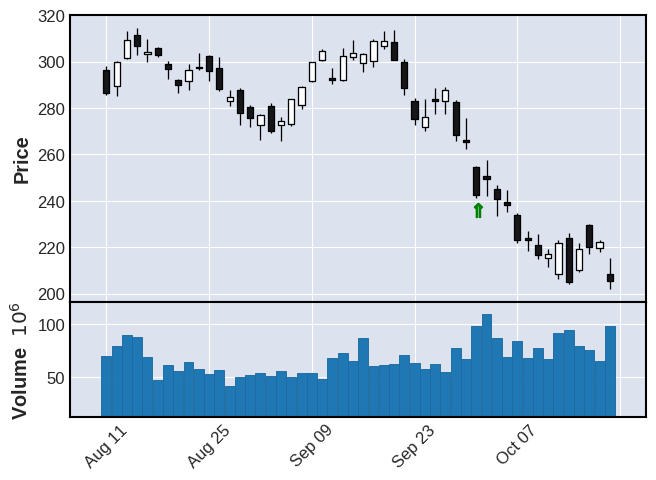

In [94]:
df = yf.Ticker('TSLA').history('50d', actions=False)

print(df.loc['2022-10-03 00:00:00-04:00'].name)
print(df.loc['2022-10-03 00:00:00-04:00'].name==pd.to_datetime('2022-10-03 00:00:00-04:00'))


print(np.where(df.loc['2022-10-03 00:00:00-04:00'].name=='2022-10-03 00:00:00-04:00', 1, np.nan))
buy = np.where(df.index=='2022-10-03 00:00:00-04:00', 1, np.nan) * 0.98 * df['Low']
apd = [mpf.make_addplot(buy, scatter=True, markersize=100, marker=r'$\Uparrow$', color='green')]
mpf.plot(df, type='candle', volume=True, addplot=apd)


In [3]:
#  create function to plot market and indexes
def plotPerformance(arg):
    df = arg
    df.info()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()
print('function plotPerformance created')

function plotPerformance created


In [166]:
#tsla=yf.Ticker("ENPH").history('5y')
#mpf.plot(tsla['2021-01-01':'2022-09-10'])

#tsla.to_csv('tsla.csv')
# df=pd.read_csv('patterns.csv')
q = '\
[d]O.0 / [d]C.1 > 1.4 \n\
AND [d]C.1 > [d]AVGC20.0 \n\
AND [d]AVGC10.0 > [d]AVGC20.0 \n\
AND [d]AVGC20.0 > [d]AVGC50.0 \n\
AND [d]AVGC50.0 > [d]AVGC100.0 \n\
AND [d]AVGC100.0 > [d]AVGC200.0 \n\
AND [d]AVGC100.0 > [d]AVGC200.0 \n\
AND (\n\
    [d]DV.0 > 1.0 \n\
    OR [d]MINDV3.1 > 2.0\n\
    OR [d]AVGDV20.0 > 3.0\n\
)\n\
AND (\n\
    [d]ATR1.0 > 8.0 \n\
    OR [d]ATR20.0 > 5.0 \n\
    OR [d]ATR20.20 > 5.0 \n\
    OR [d]ATR20.40 > 5.0 \n\
)\
';

try:
  r = requests.get('https://194c-207-253-236-153.ngrok.io/search?q=' + urllib.parse.quote(q))
  df = pd.DataFrame(r.json()['payload'])
except Exception as e:
  print(e.__class__ + ': ' + e)
  print(r)
  
df.info()
df['patternTime'] = pd.to_datetime(df['patternTime'])
df['patternTimeFrom'] = df['patternTime'] + pd.DateOffset(days=-60)
df['patternTimeTo'] = df['patternTime'] + pd.DateOffset(days=100)
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   symbol       44 non-null     object
 1   patternTime  44 non-null     object
dtypes: object(2)
memory usage: 832.0+ bytes
   symbol patternTime patternTimeFrom patternTimeTo
0    ACGL  2019-01-02      2018-11-03    2019-04-12
1     AMN  2019-01-02      2018-11-03    2019-04-12
2     DOC  2019-01-02      2018-11-03    2019-04-12
3      EE  2019-01-02      2018-11-03    2019-04-12
4    ESRT  2019-01-02      2018-11-03    2019-04-12
5     FSV  2019-01-02      2018-11-03    2019-04-12
6    NVAX  2019-01-02      2018-11-03    2019-04-12
7     PBH  2019-01-02      2018-11-03    2019-04-12
8     SLP  2019-01-02      2018-11-03    2019-04-12
9    SOXX  2019-01-02      2018-11-03    2019-04-12
10   TCBI  2019-01-02      2018-11-03    2019-04-12
11   PHUN  2019-01-15      2018-11-16    2019-04-25
12   ARRY  20

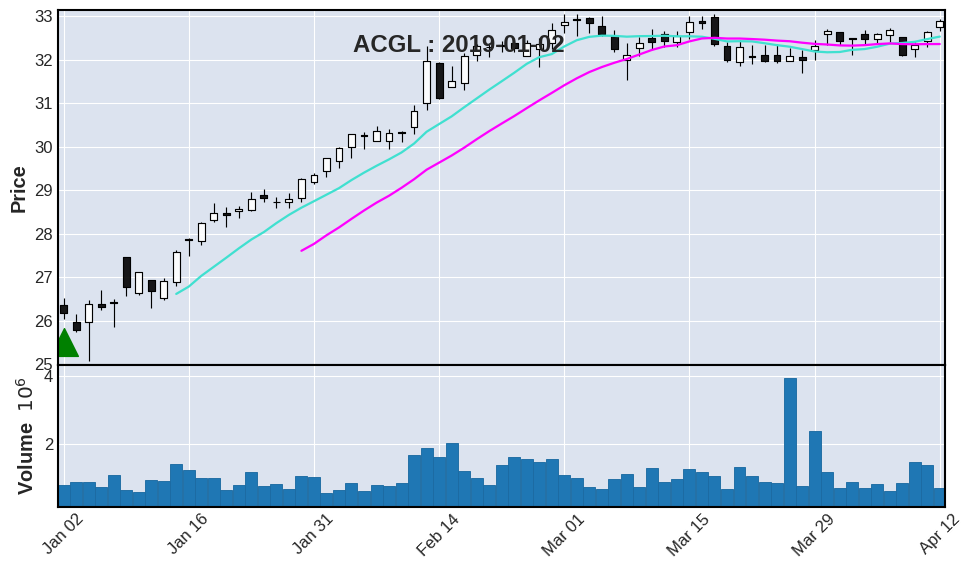

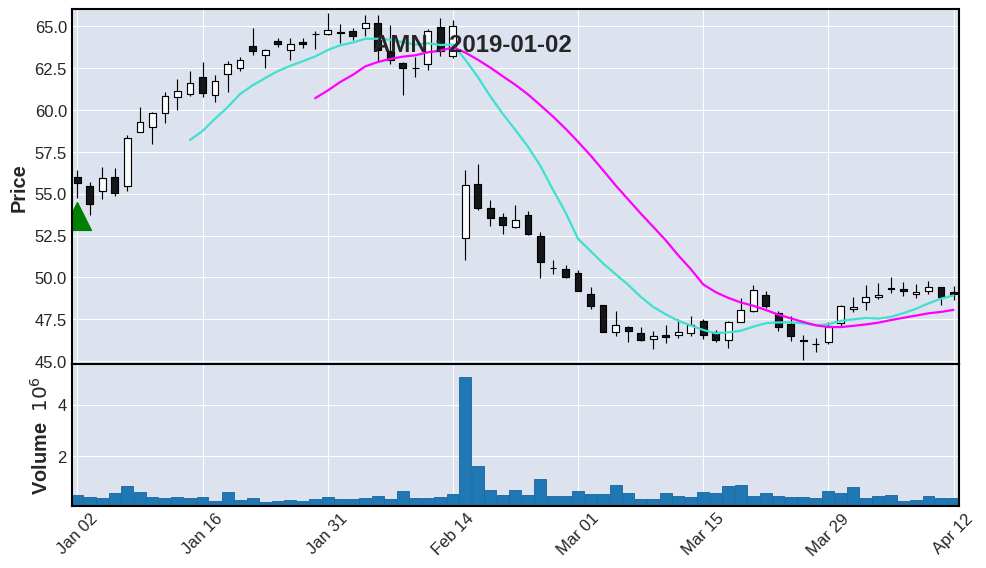

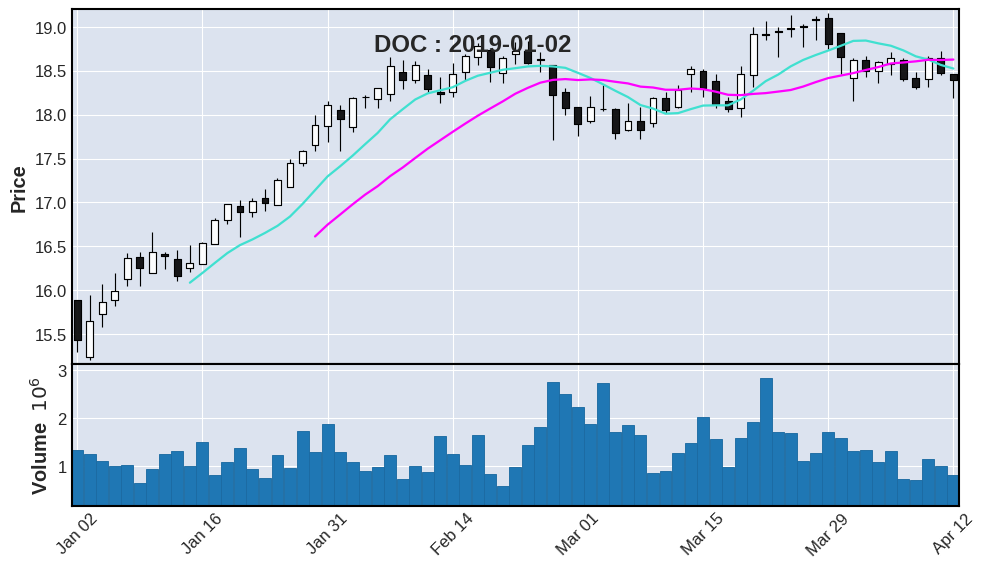

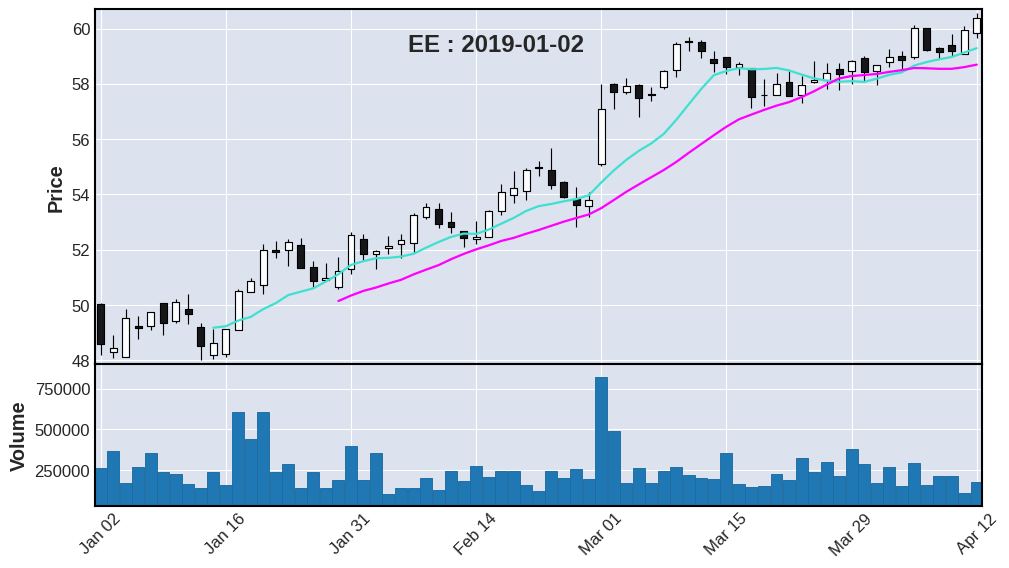

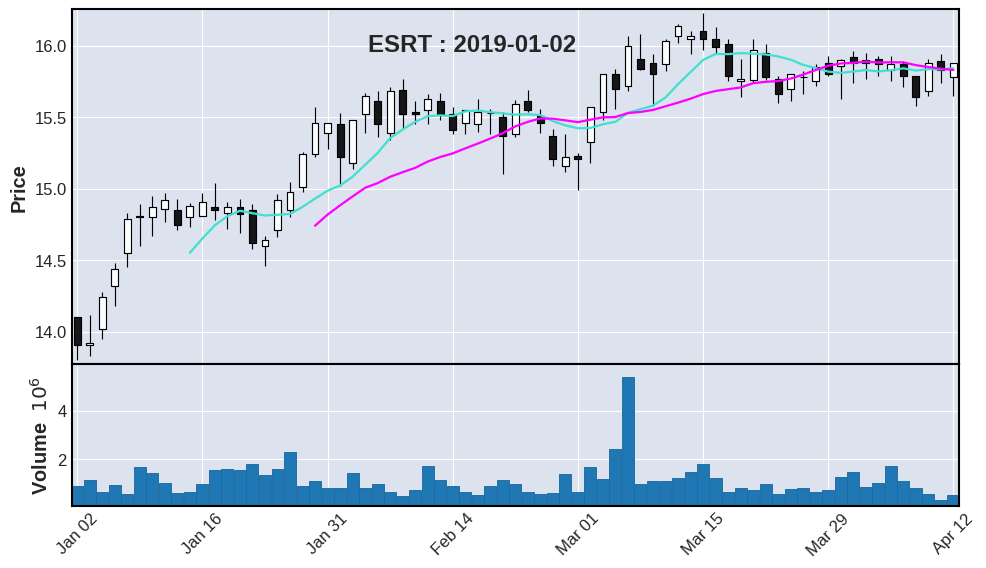

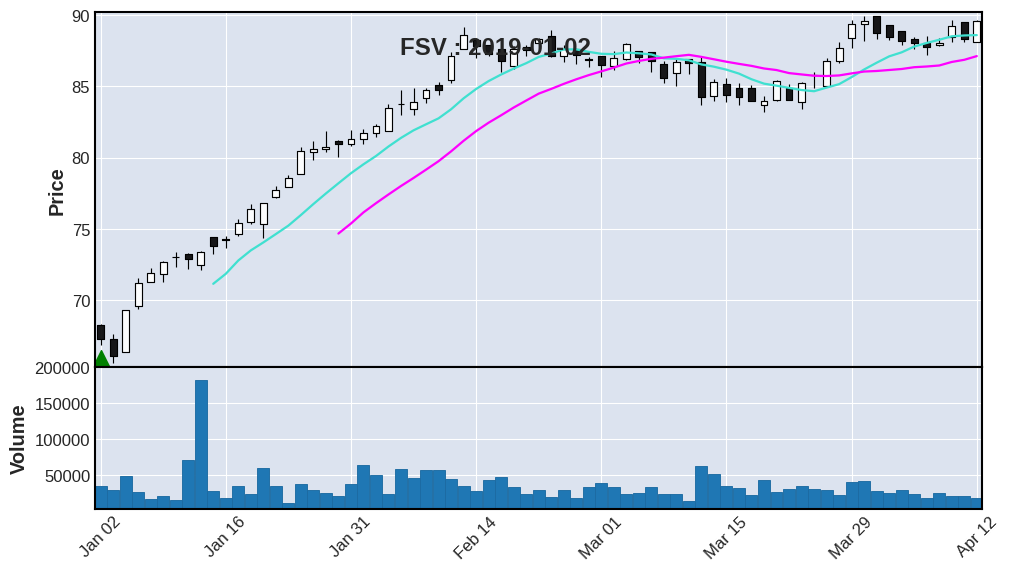

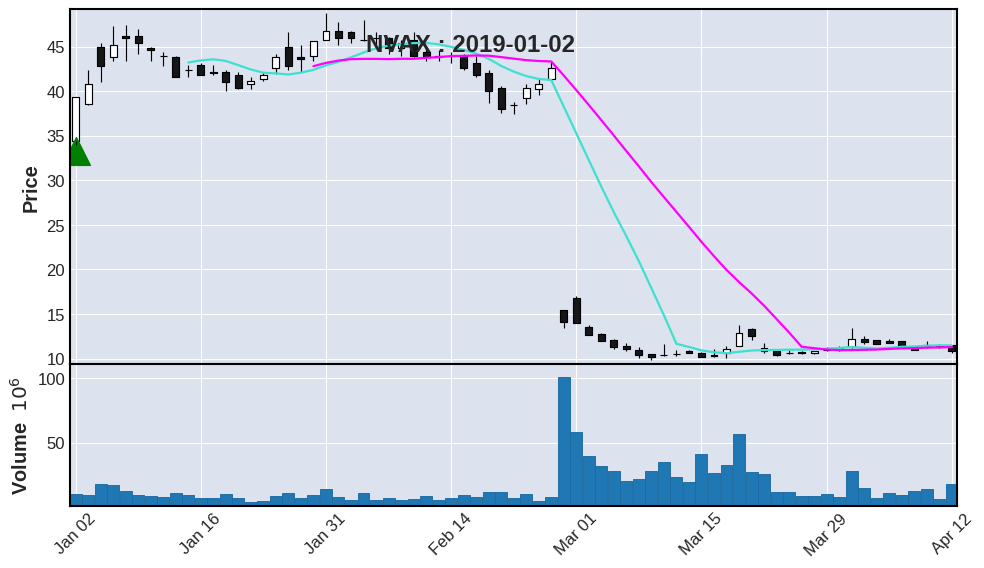

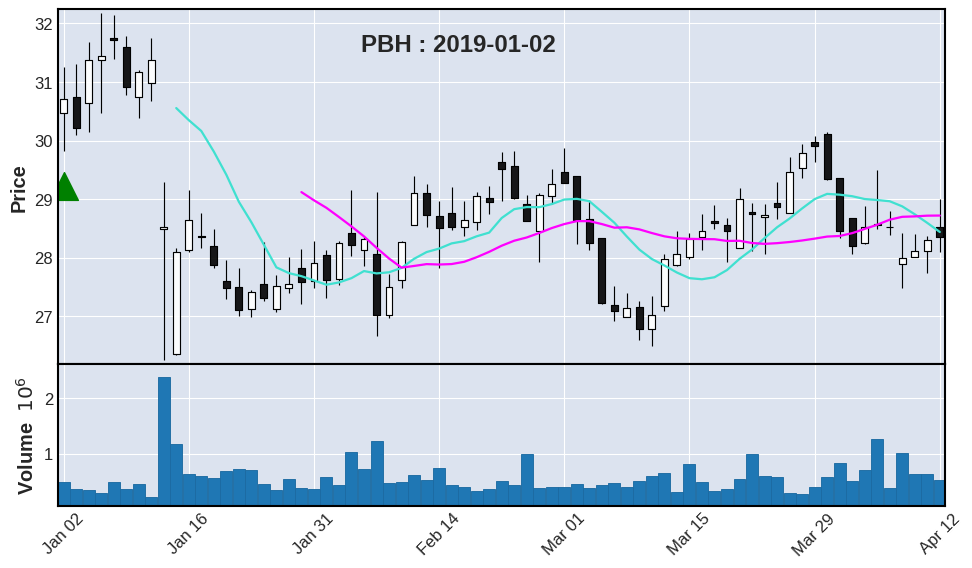

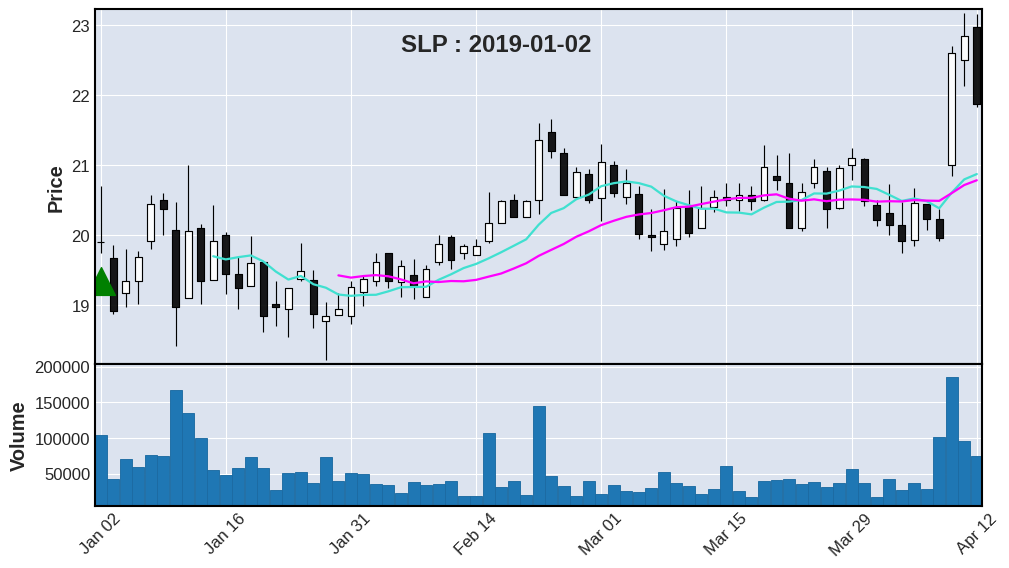

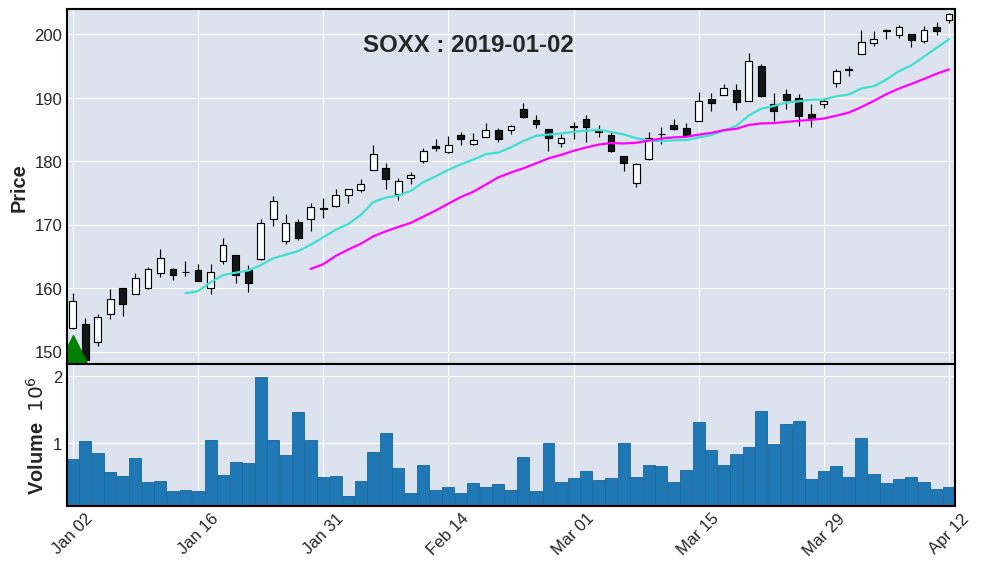

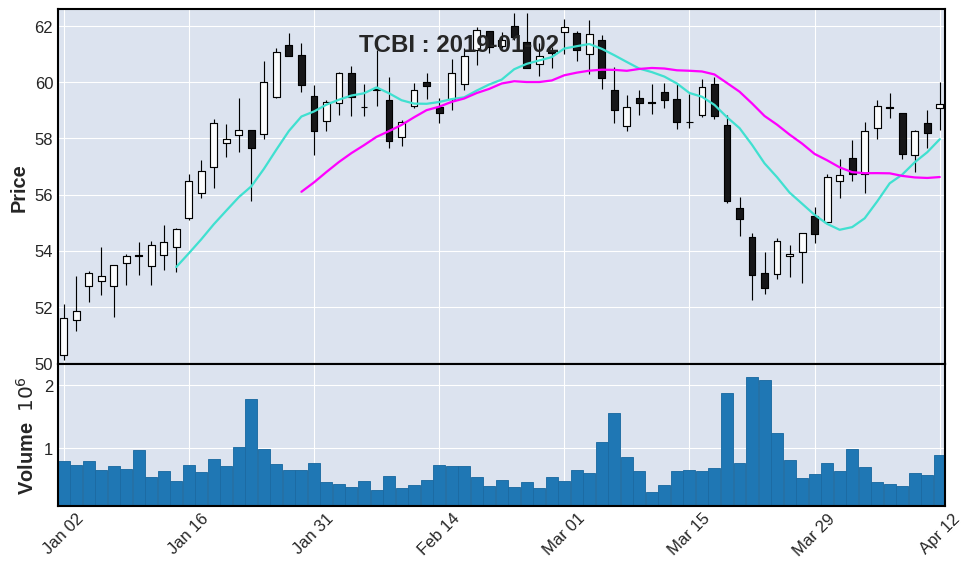

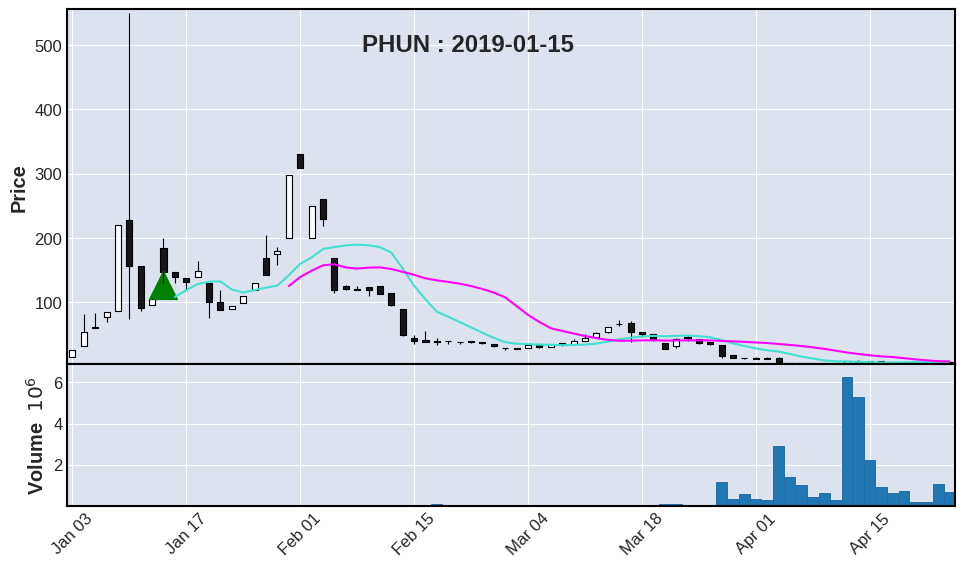

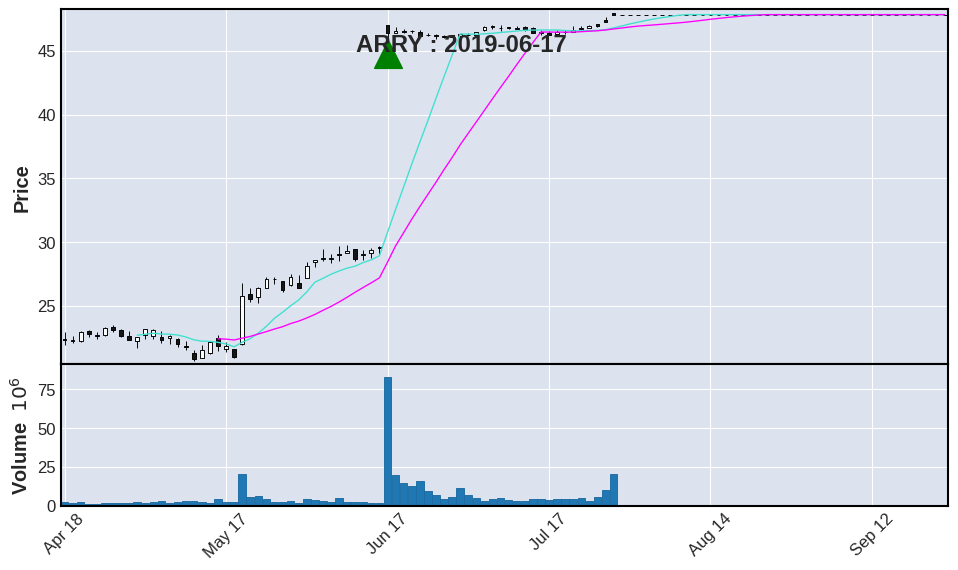

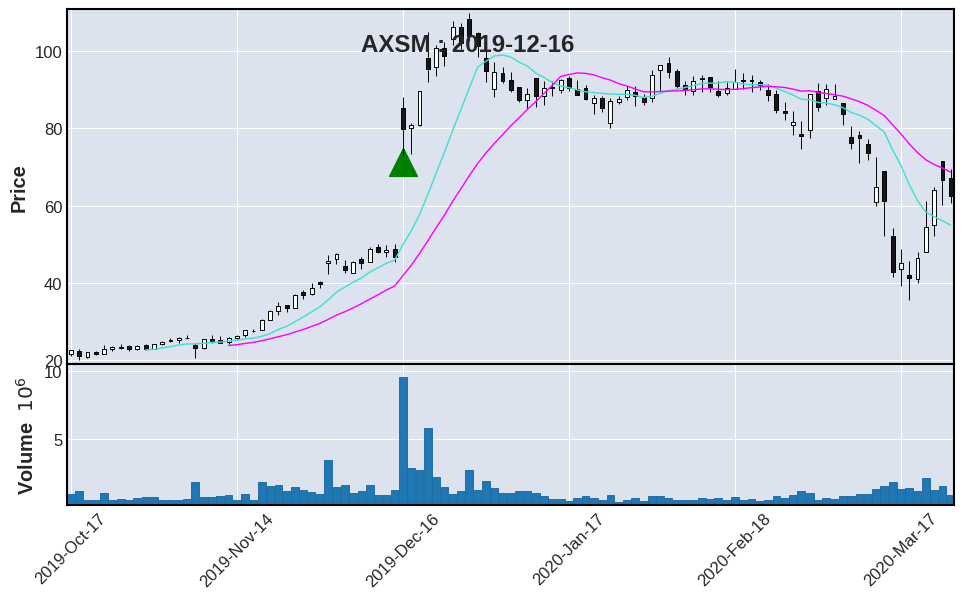

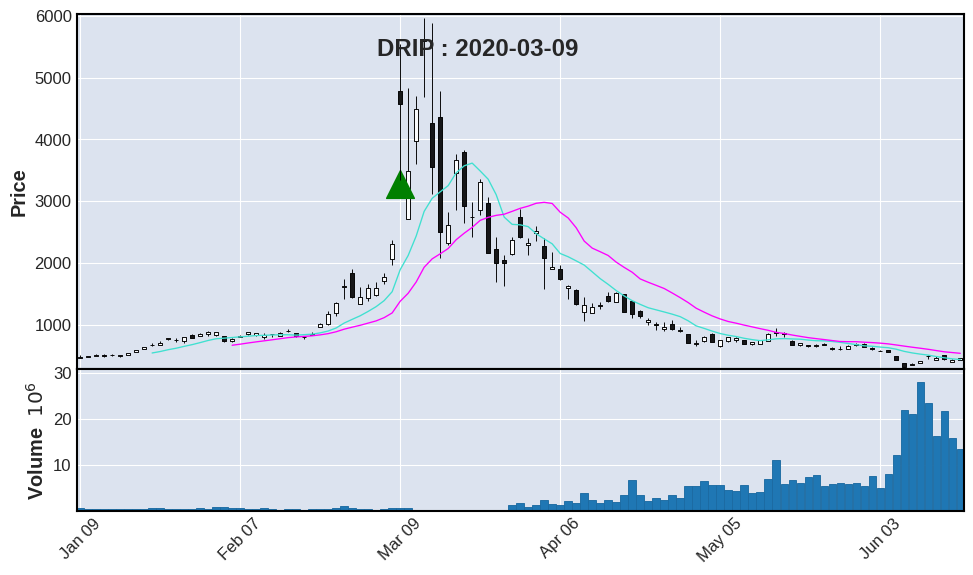

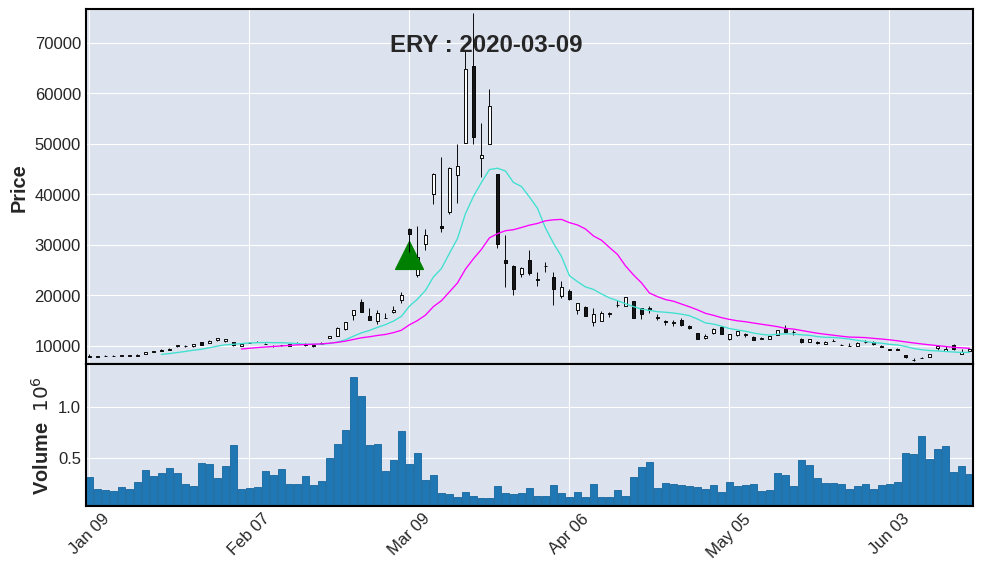

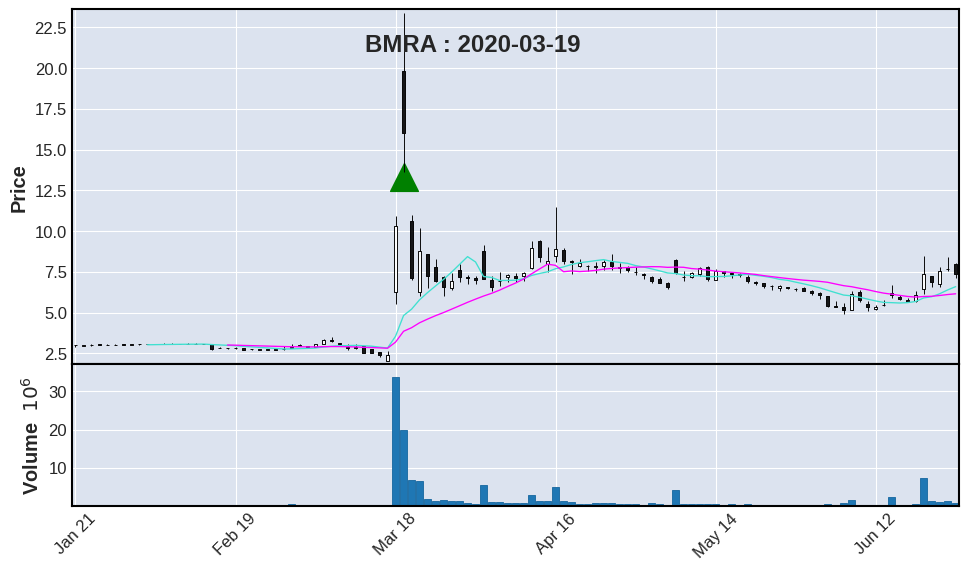

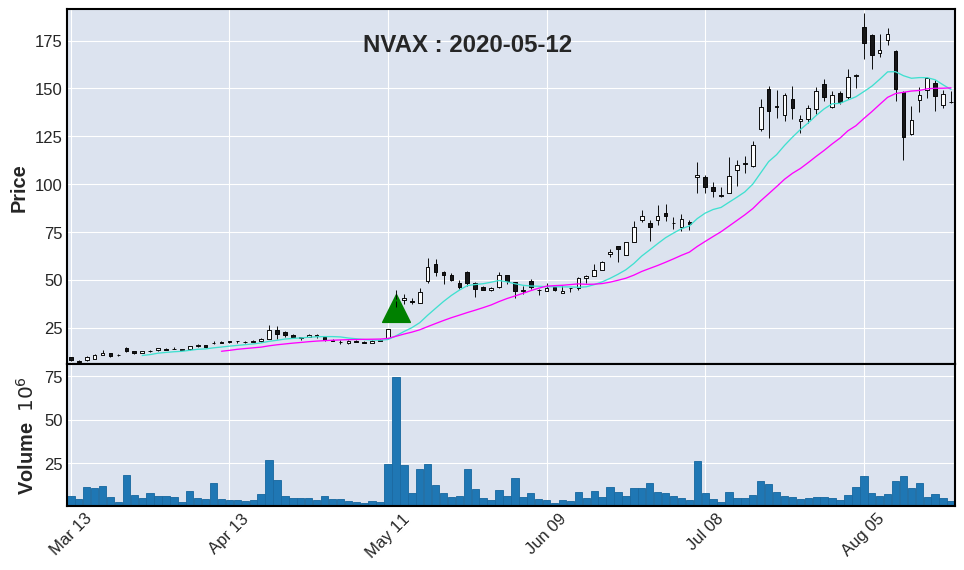

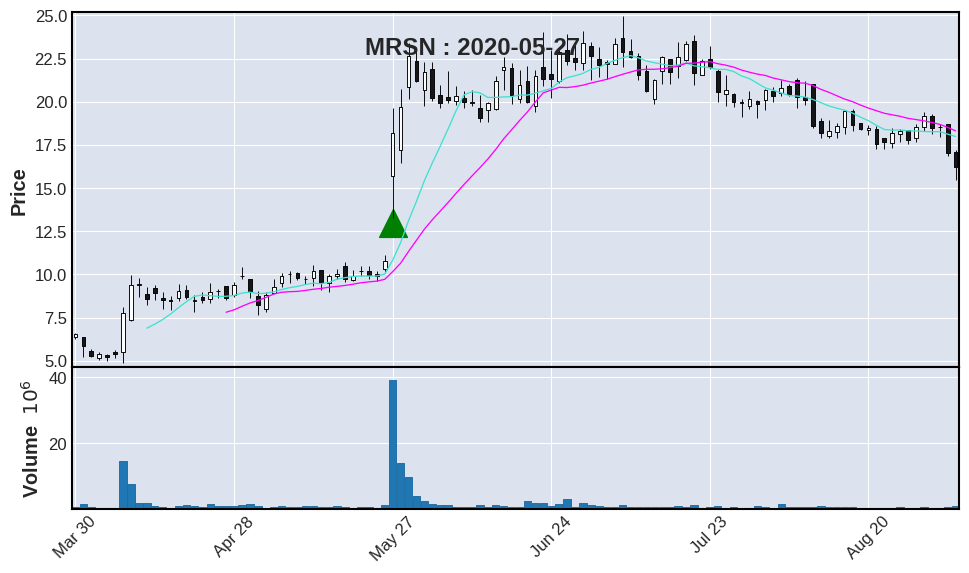

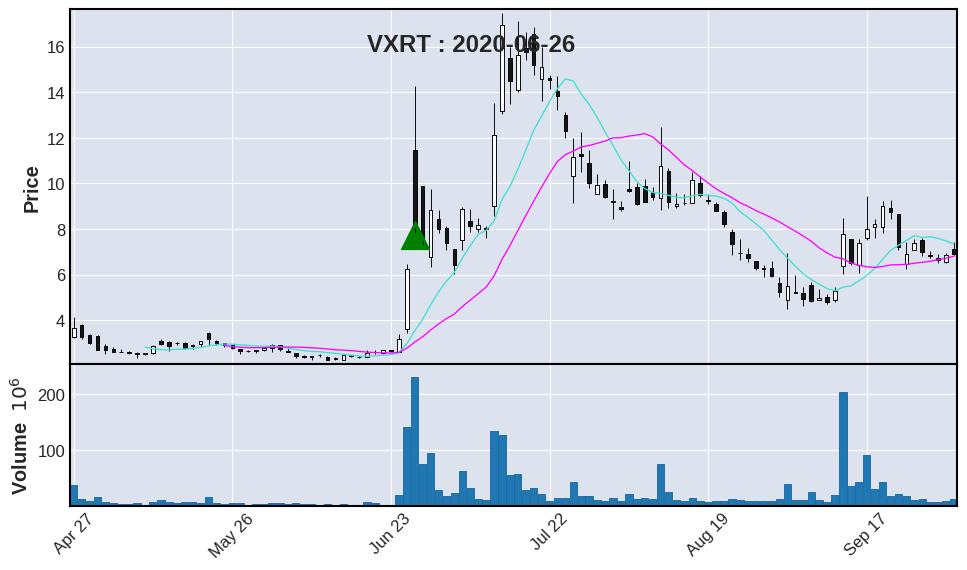

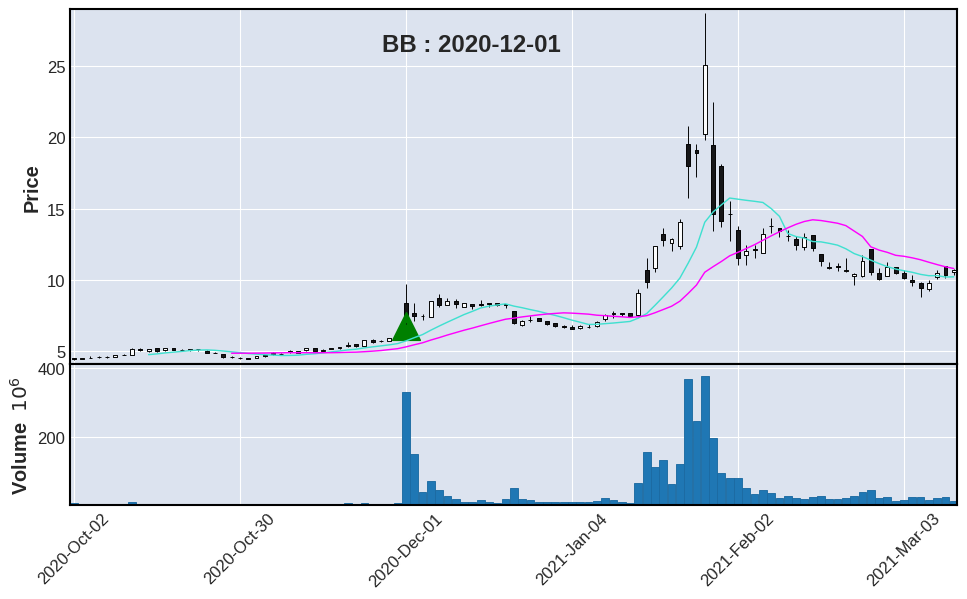

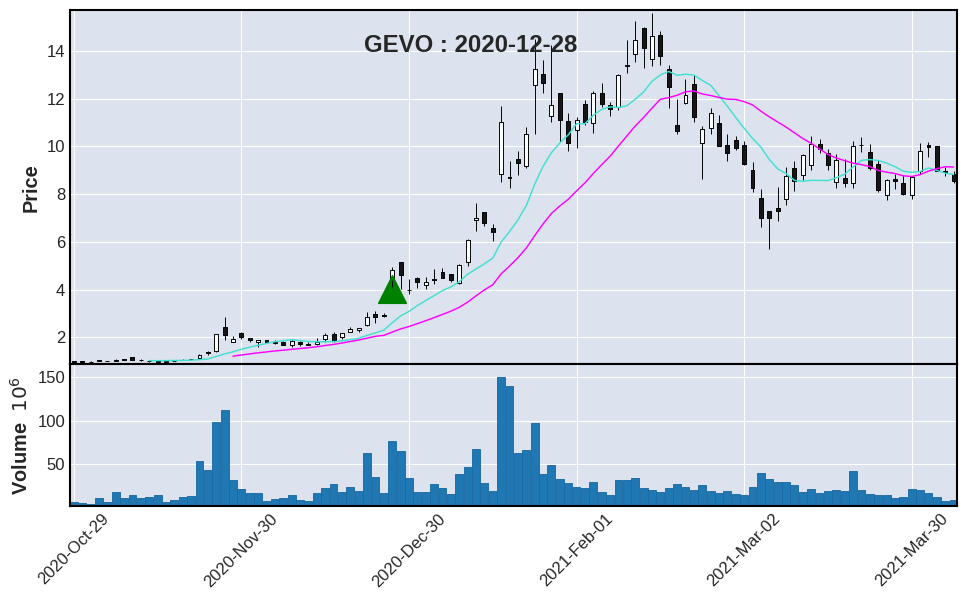

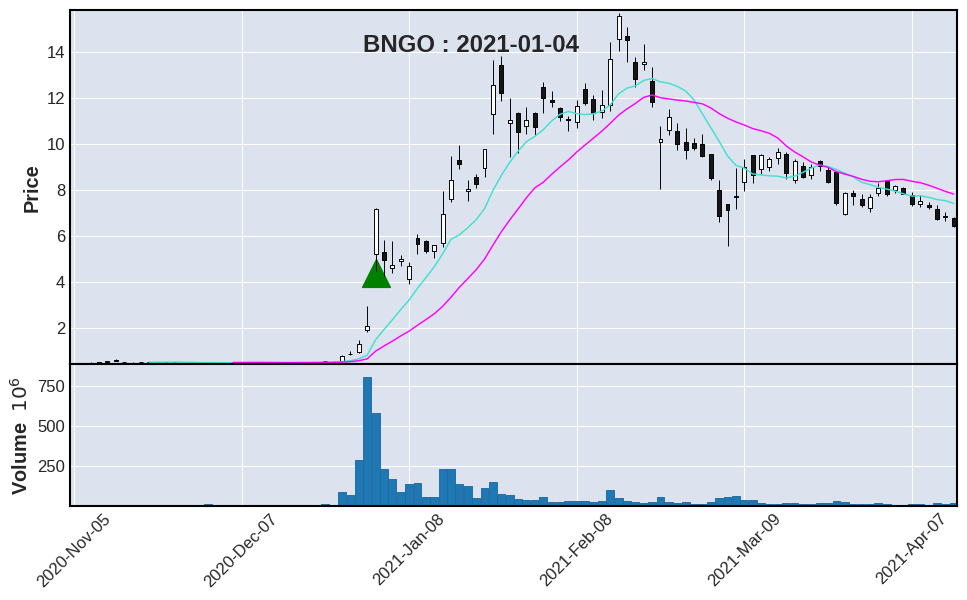

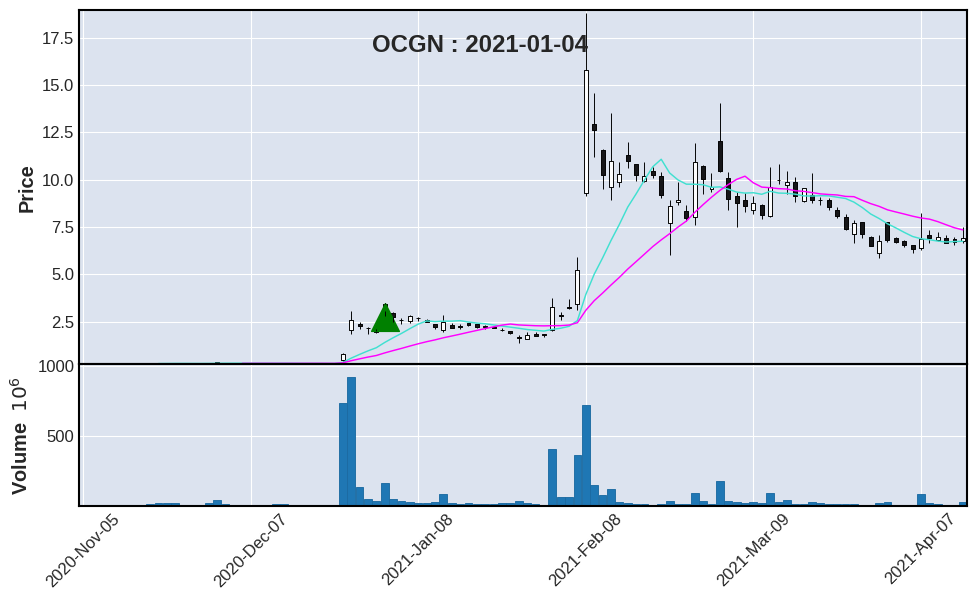

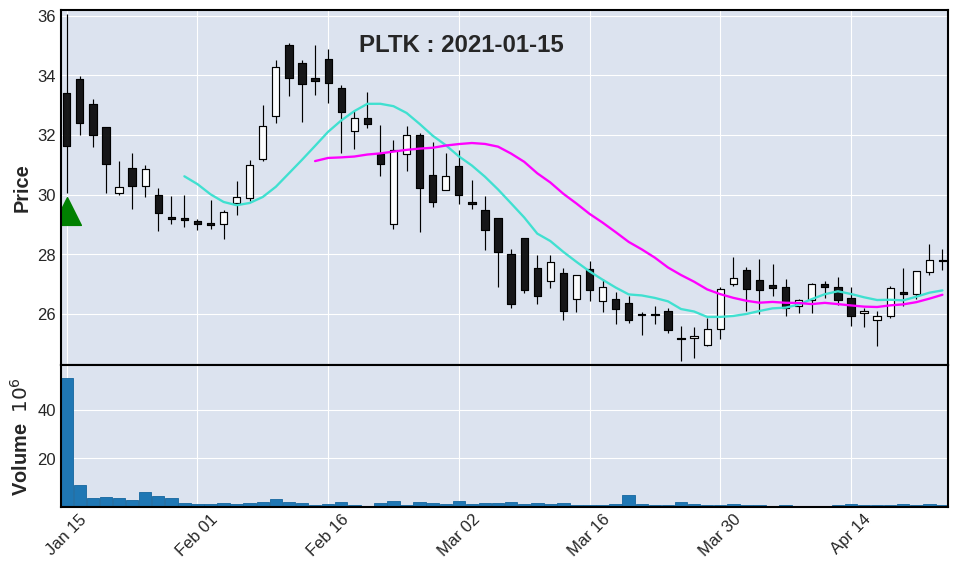

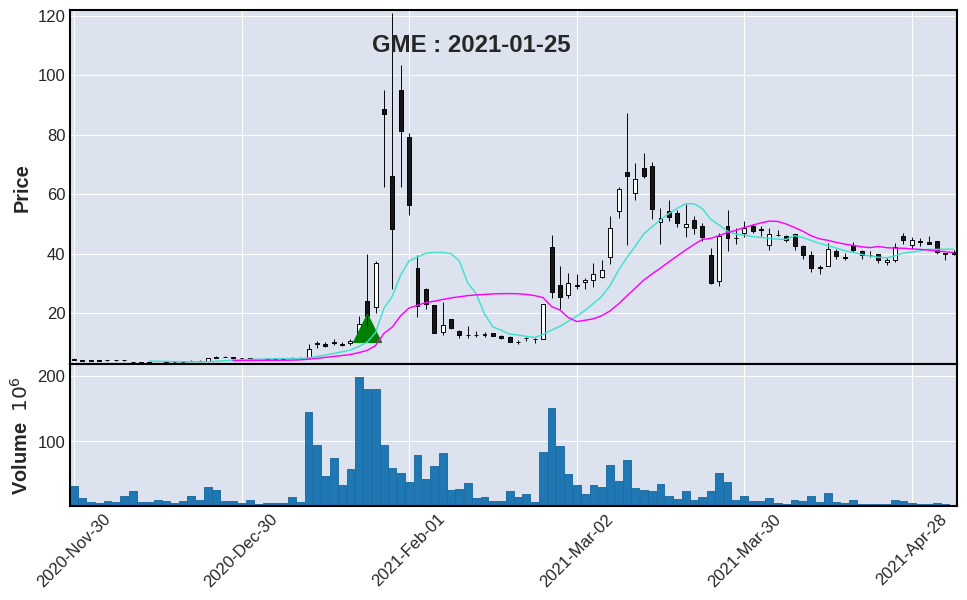

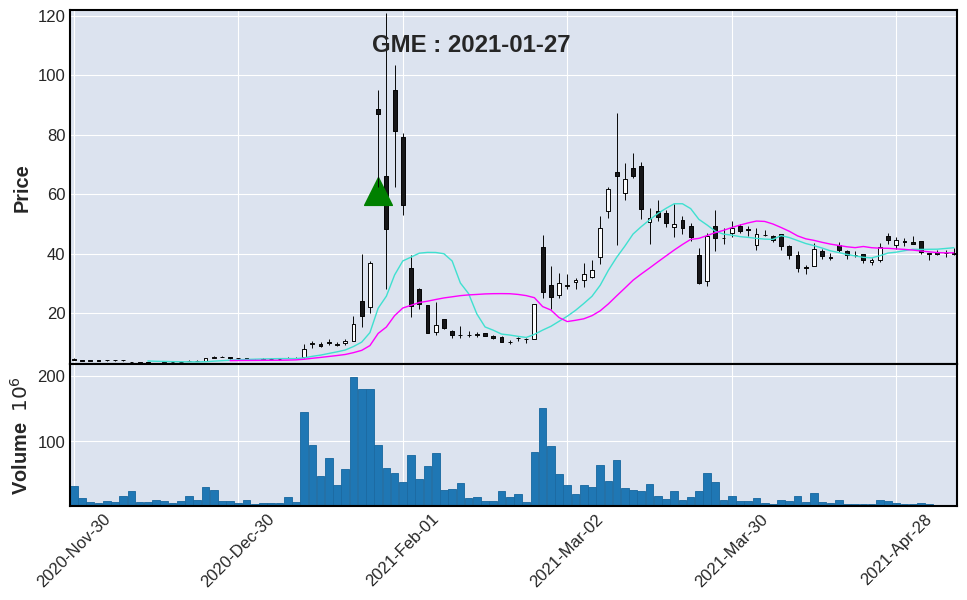

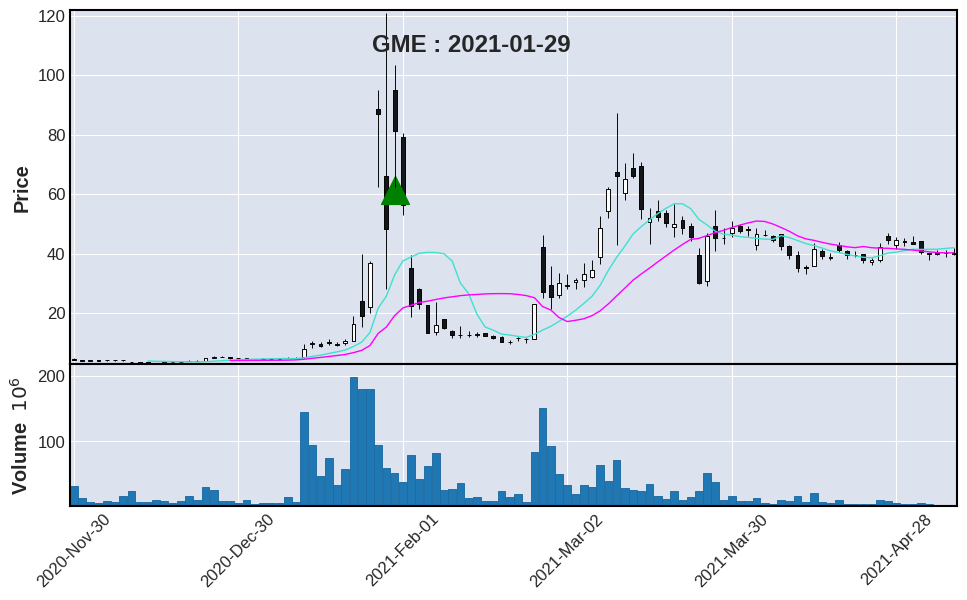

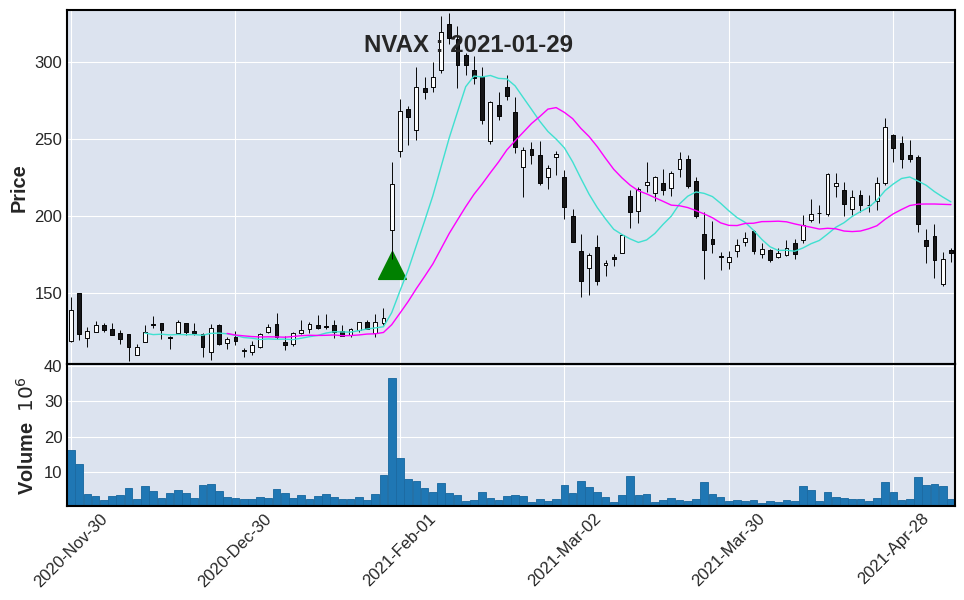

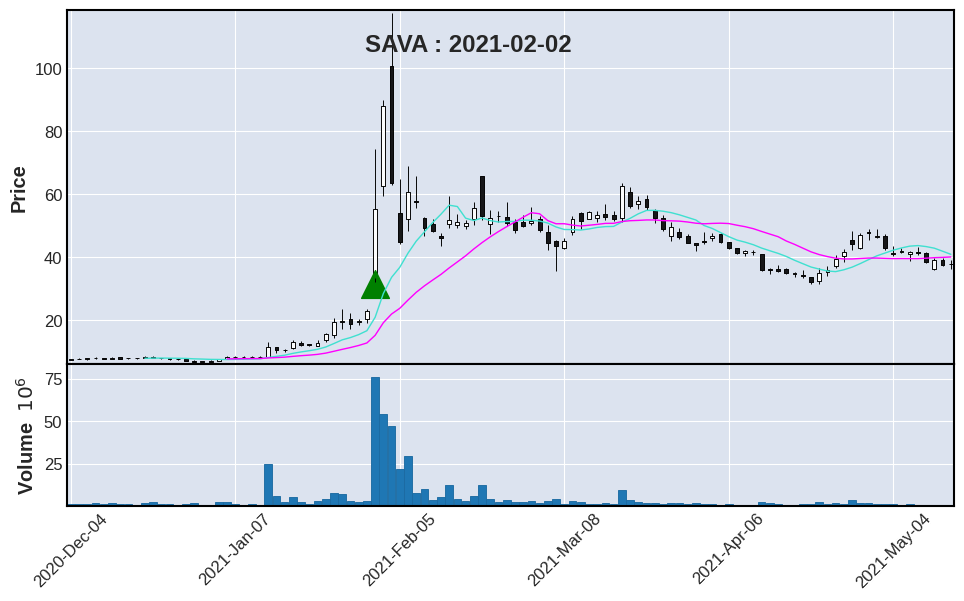

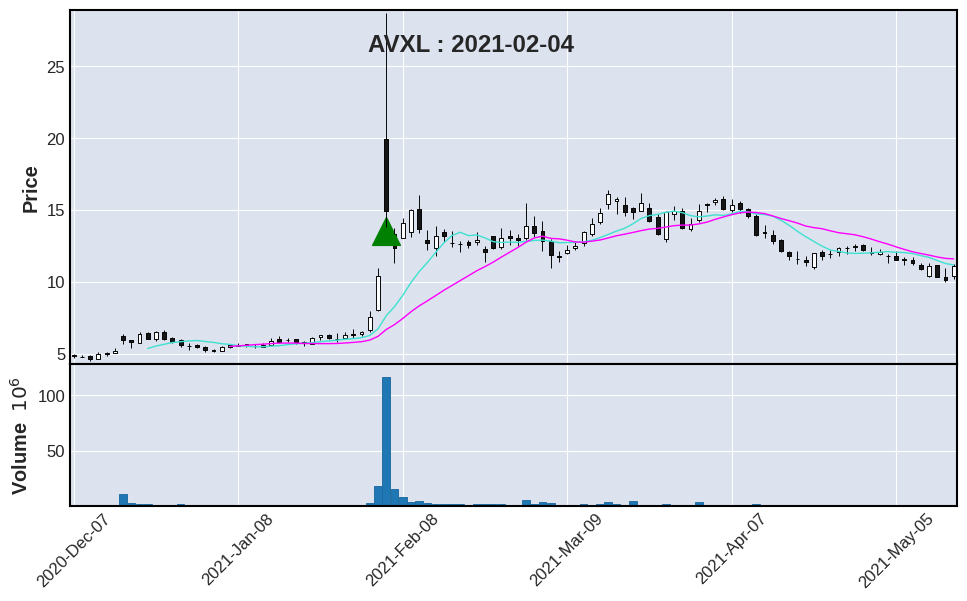

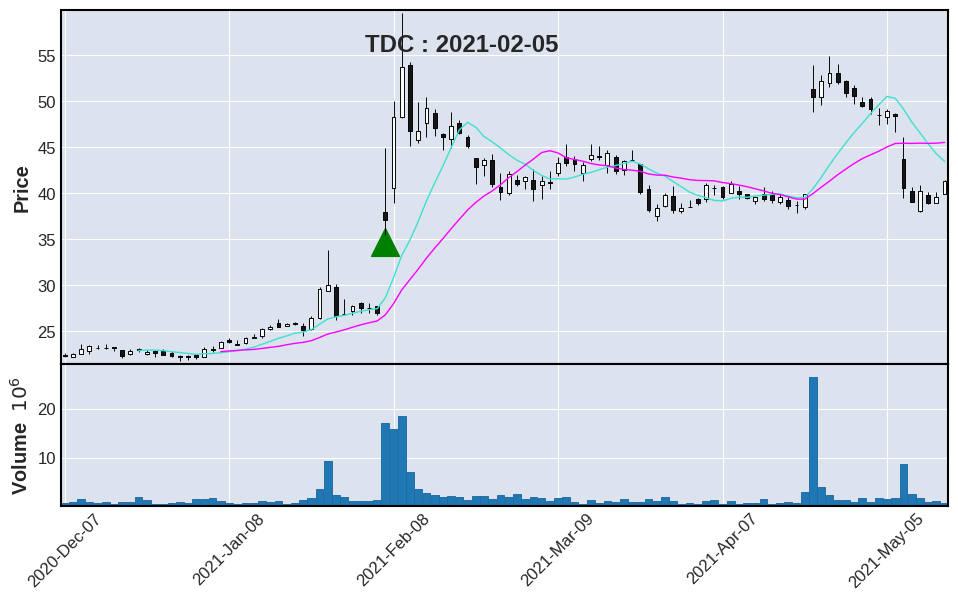

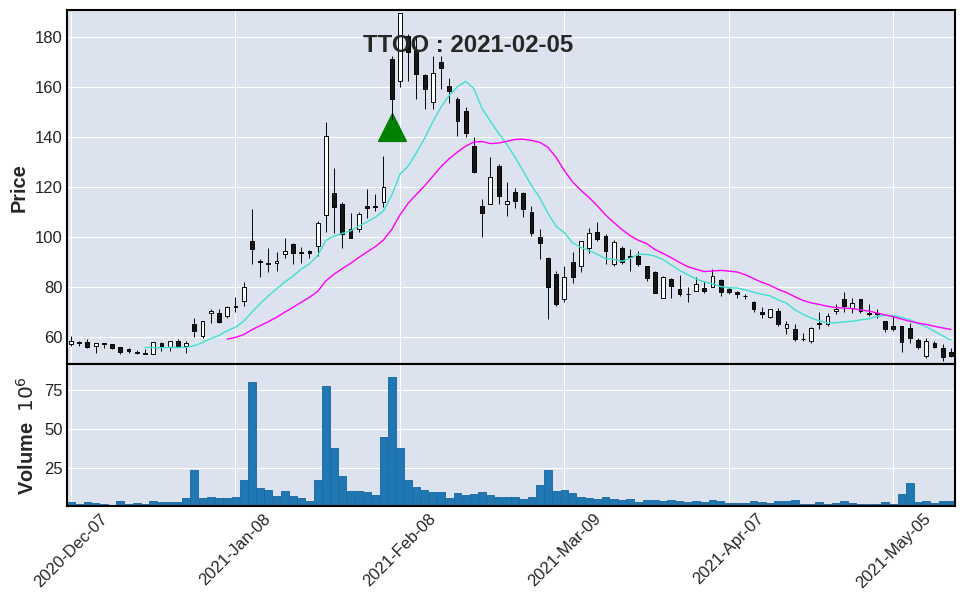

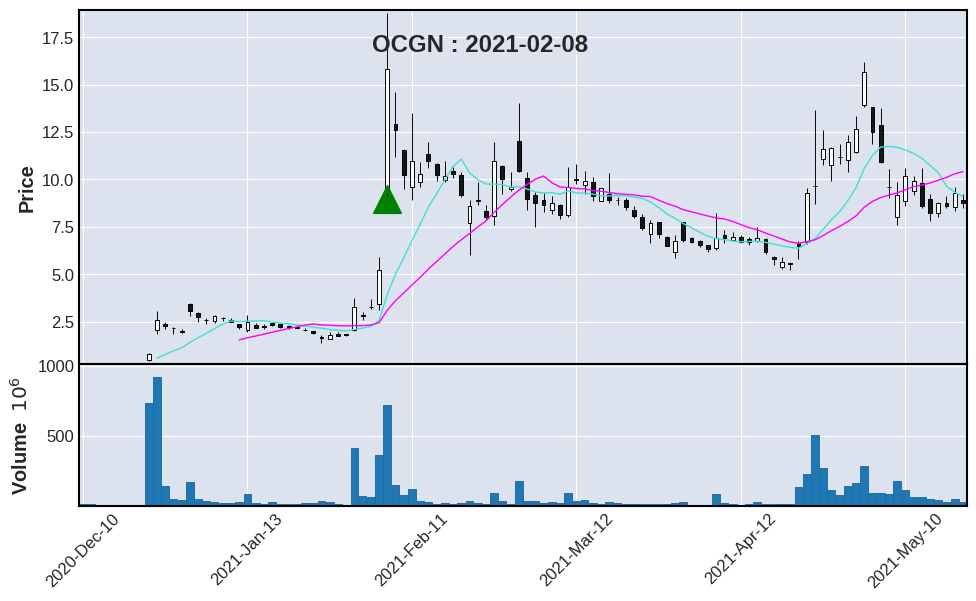

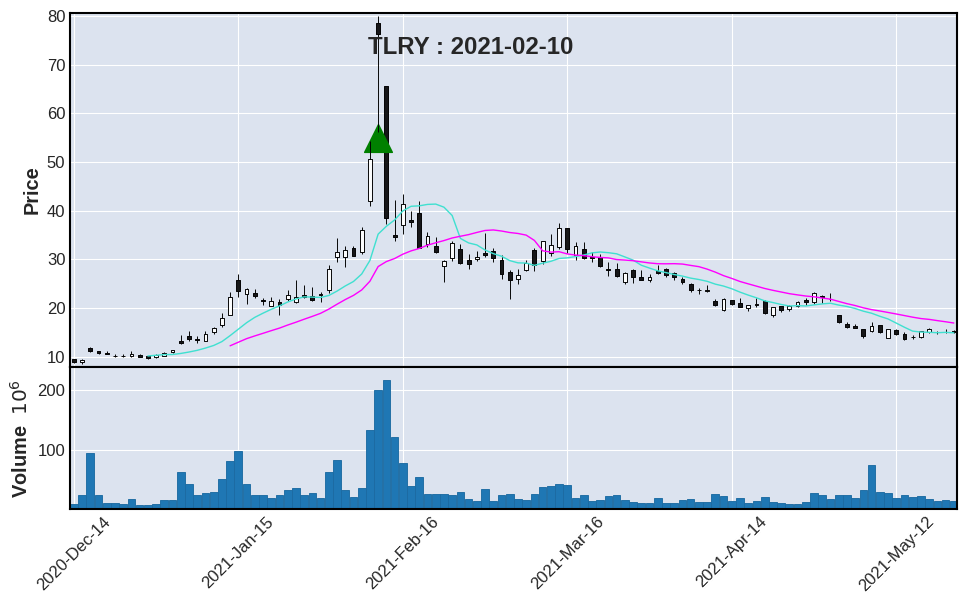

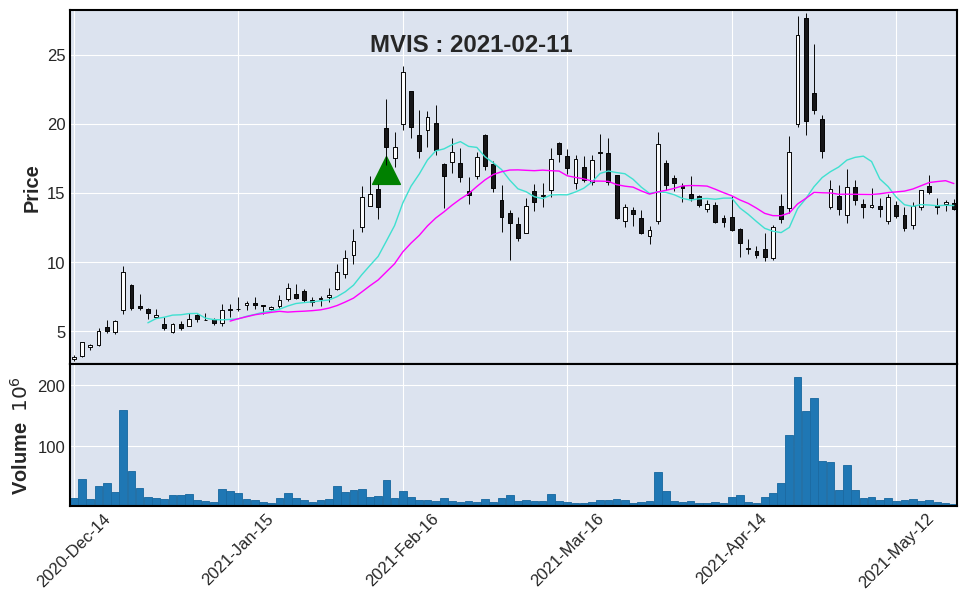

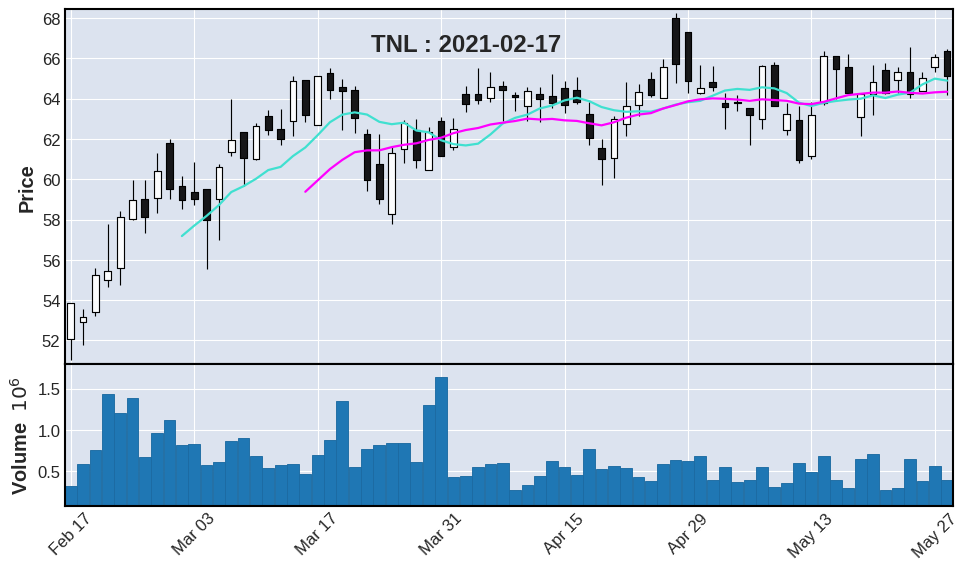

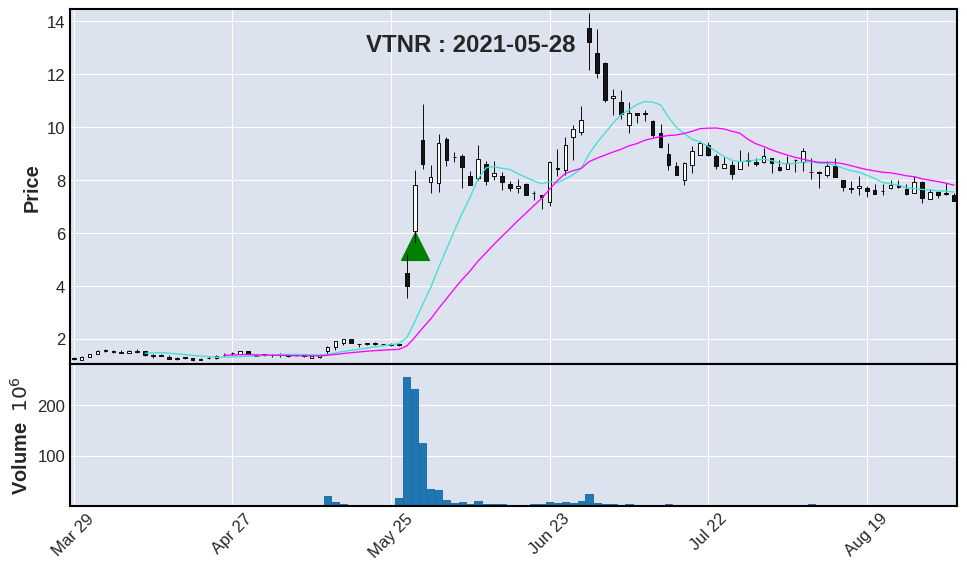

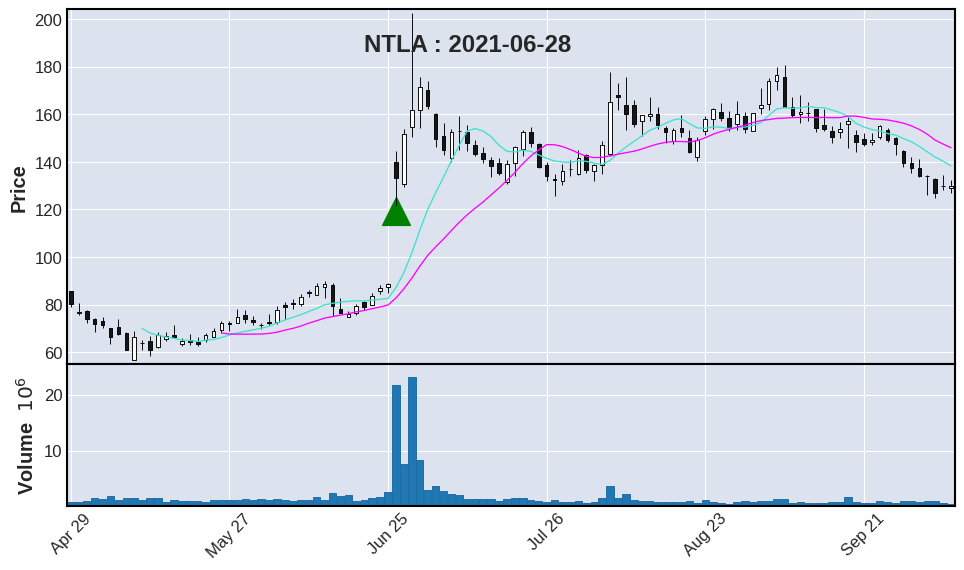

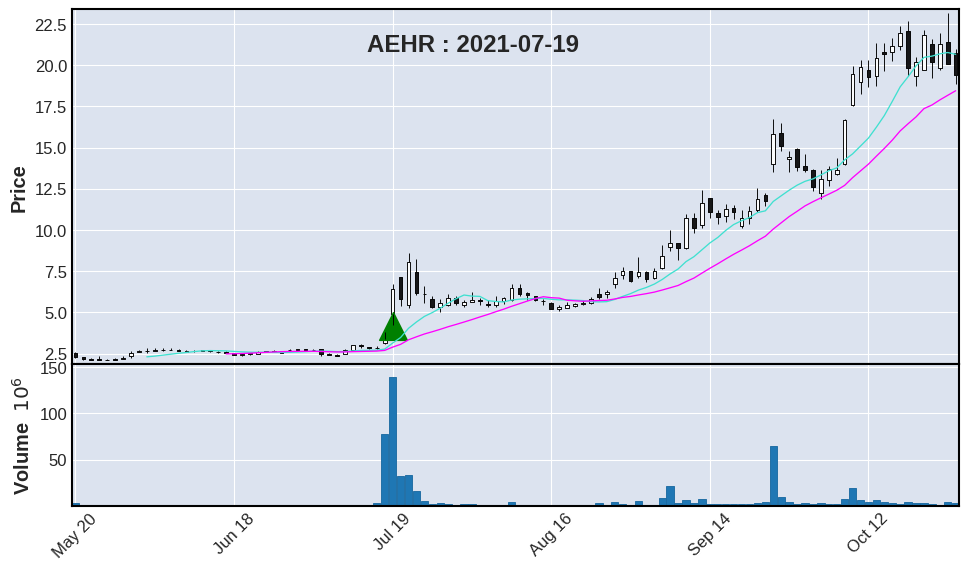

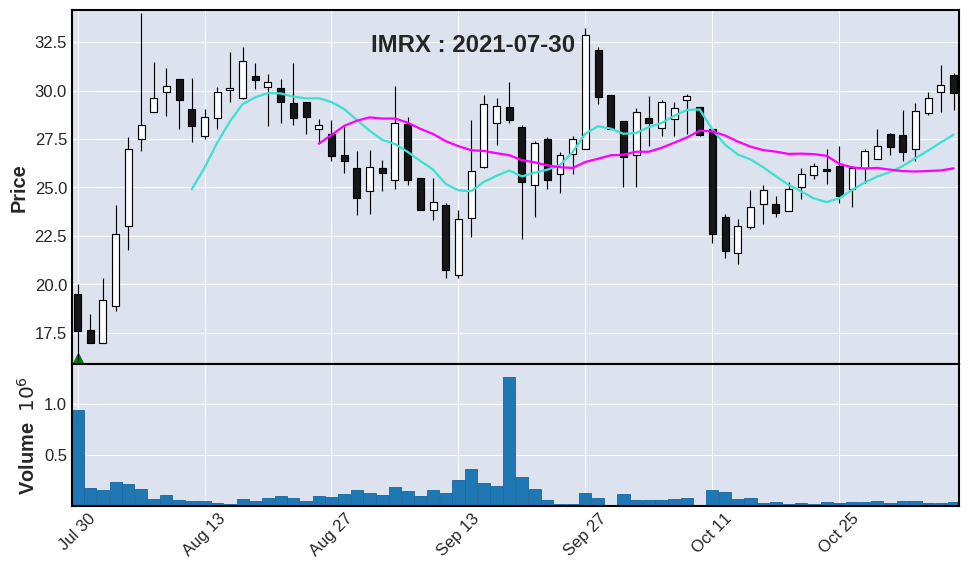

<class 'requests.exceptions.JSONDecodeError'>
Expecting value: line 2 column 1 (char 1)
<Response [429]>

<!doctype html5>
<html>
    <head>
        <style type="text/css">
         
        strong { font-weight: bold; }
        hr { -moz-box-sizing: content-box; box-sizing: content-box; height: 0; }
        html { font-family: sans-serif;   -ms-text-size-adjust: 100%;   -webkit-text-size-adjust: 100%;   } body { margin: 0; }
        a { background-color: transparent; }
        a:active, a:hover { outline: 0; }
        </style>

        <style type="text/css">
            body { background-color: #f5f5f5; }
            .container { width: 500px; margin: auto; color: #444; padding: 5px; }
            a, strong { color: purple; text-decoration: none; }
            a:hover { text-decoration: underline; }
            h2 { text-align: center; color: #000; }
            p { line-height: 20px; }
        </style>
    </head>
    <body>
        <div class="container">
            
            


In [176]:
for index, row in df.iterrows():
    
    start=row['patternTimeFrom'].strftime('%Y-%m-%d')
    end=row['patternTimeTo'].strftime('%Y-%m-%d')

# urllib.parse.quote(query)
    url = 'https://194c-207-253-236-153.ngrok.io/chart/' + row['symbol'] + '/d?from=' + urllib.parse.quote(start) + '&to=' + urllib.parse.quote(end)
    # print(url)
    chartResponse = requests.get(url)
    # print(chartResponse)
    # chartDf = pd.json_normalize(json.loads(chartResponse.text))
    chartDf = None
    try:
      chartDf = pd.DataFrame(chartResponse.json()['payload'])
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      break
    
    chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
    chartDf = chartDf.set_index('tickTime')
    chartDf.drop(['id', 'symbol','created'], axis=1, inplace=True)
    # print(ticker.head())

    # ticker=yf.Ticker(row['symbol']).history('5y', start=start, end=end, actions=False)
    # print(chartDf.head())

    # ticker.info

    entry = row['patternTime'].strftime('%Y-%m-%d')

    buy = np.where(chartDf.index==entry, 1, np.nan) * 0.98 * chartDf['low']
    apd = [mpf.make_addplot(buy, scatter=True,  type='scatter', markersize=400, marker='^', color='green')]

    # print(chartDf[start:end])

    mpf.plot(chartDf[start:end], type='candle', 
         volume=True, mav=(10,20),title = row['symbol'] + ' : ' + row['patternTime'].strftime('%Y-%m-%d'),
        tight_layout=True, figratio=(16,9), addplot=apd)
    
    # plotPerformance(ticker)
